How are Missouri colleges serving the low-income students?

Source: College Scorecard Database-U.S. Department of Education.

Workflow:
1.	Which collges are more economically diversified and rewarding?

-Data analysis with MySQL, Python, Jupyter notebook. Used python to get the basic shape of the data, and  MySQL queries to find the specific outliers. 
-Interactive graphics, built with Tableau, Matplotlib and Seaborn(Python visualization libraries). 
-Interactive database, built with HTML/CSS, JavaScript.
-Interactive calculator to quantify the economic reward of college, with HTML/CSS, JavaScript(to be continued).

2. What colleges are doing to recruit and help economically disadvantaged students? What are the obstacles? How to overcome? (such as the state budget cut). How to improve both Access and Success?
-Research and interview.


In [3]:
import pandas as pd
import matplotlib as mplstyle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

height has been deprecated.



In [4]:
scorecard = pd.read_csv('14-15MO.csv')


In [5]:
print scorecard

         UNITID       OPEID   OPEID6                                       college_name            city state         ZIP  type  ST_FIPS  region   LATITUDE  LONGITUDE  admission_rate  SAT_AVG  undergrad_enrollment  percentage_white  percentage_black  percentage_hispanic  percentage_asian  percentage_american_indian  percentage_hawaiian_pacific_islander  percentage_non_resident_alien  avg_income_from_mid_income_bracket  avg_income_from_high_income_bracket  earning_above_threshold  avg_net_price  median_earnings  avg_income_from_low_income_bracket  first_bracket_net_price  second_bracket_net_price(public  third_bracket_net_price  fourth_bracket_net_price  fifth_bracket_net_price  attendance_cost  instate_tuition  outofstate_tuition  pell_recipients  fed_loan_recipients  compeletion_rate  completion_rate_white  completion_rate_black  completion_rate_hispanic  completion_rate_asian  completion_rate_american_indian  debt_graduated  debt_withdrew  debt_low_income  debt_mid_income  debt_high_

In [6]:
scorecard.describe(include = 'all') 

,UNITID,OPEID,OPEID6,college_name,city,state,ZIP,type,ST_FIPS,region,LATITUDE,LONGITUDE,admission_rate,SAT_AVG,undergrad_enrollment,percentage_white,percentage_black,percentage_hispanic,percentage_asian,percentage_american_indian,percentage_hawaiian_pacific_islander,percentage_non_resident_alien,avg_income_from_mid_income_bracket,avg_income_from_high_income_bracket,earning_above_threshold,avg_net_price,median_earnings,avg_income_from_low_income_bracket,first_bracket_net_price,second_bracket_net_price(public,third_bracket_net_price,fourth_bracket_net_price,fifth_bracket_net_price,attendance_cost,instate_tuition,outofstate_tuition,pell_recipients,fed_loan_recipients,compeletion_rate,completion_rate_white,completion_rate_black,completion_rate_hispanic,completion_rate_asian,completion_rate_american_indian,debt_graduated,debt_withdrew,debt_low_income,debt_mid_income,debt_high_income,debt_pell,debt_nopell,population_debt_low_income,population_debt_middle_income,population_debt_high_income,population_debt_pell,population_repayment_cohort,population_recieving_loan,population_recieving_pell,RET_FT4,RET_FTL4,majority_black_flag,majority_pell_flag
count,2.000000e+02,2.000000e+02,200.000000,200,200,200,200,200.000000,200.0,200.0,199.000000,199.000000,64.000000,36.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,81.000000,84.000000,137.000000,176.000000,138.000000,105.000000,171.000000,42.000000,44.000000,37.000000,29.000000,107.000000,110.000000,110.000000,187.000000,187.000000,171.000000,68.000000,62.000000,58.000000,48.000000,80.000000,152.000000,155.000000,150.000000,127.000000,131.000000,144.000000,152.000000,163.000000,146.000000,150.000000,167.000000,167.000000,153.000000,124.000000,100.000000,64.000000,200,200
unique,NaN,NaN,NaN,199,77,1,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,Bryan University,Kansas City,MO,65807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
freq,NaN,NaN,NaN,2,28,200,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182,111
mean,3.618320e+05,1.869180e+06,16191.775000,NaN,NaN,NaN,NaN,2.215000,29.0,4.0,38.489958,-92.350239,0.722353,1096.888889,1612.973404,0.704090,0.177295,0.027069,0.012004,0.006343,0.002315,0.009977,39544.444444,44180.952381,0.614489,15516.811429,34063.503650,32828.846154,14341.558824,10080.243902,11915.744186,13752.444444,12941.535714,24017.700935,13775.027273,15081.872727,0.551002,0.578269,0.572950,0.537234,0.331211,0.426534,0.496533,4525.013082,16685.447368,8305.519355,12031.200000,13431.732283,12685.790076,12966.006944,9357.016447,4062.730061,1493.561644,870.653333,4949.532934,5926.024962,0.829482,0.725702,0.710348,0.660327,NaN,NaN
std,1.072159e+06,2.702766e+06,13688.039679,NaN,NaN,NaN,NaN,0.819839,0.0,0.0,0.846905,1.779065,0.203841,100.621434,3646.889867,0.229580,0.218451,0.027651,0.022804,0.010436,0.008238,0.025819,9019.783811,11693.695925,0.161711,6320.192794,19969.472599,10643.901044,6084.176990,4142.507370,5015.142907,4808.610844,4343.951077,9666.008893,8180.251220,7547.662372,0.205272,0.250504,0.217607,0.198808,0.208934,0.294255,0.335800,5550.002953,8468.789051,3345.009893,4330.377257,5184.152373,4756.465953,5163.843869,6058.442051,14674.943365,5504.524496,2062.617852,18060.256708,28033.940222,0.118095,0.168265,0.175134,0.220890,NaN,NaN
min,1.552830e+05,1.499120e+05,1499.000000,NaN,NaN,NaN,NaN,1.000000,29.0,4.0,36.616019,-94.884341,0.083100,970.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [7]:
scorecard1 = pd.read_csv('College_Scorecard_Simplified.csv')
print scorecard1

        UNITID     OPEID                                       college_name               city state  region       region_des  type            type_des  degree      degree_des  campus campus_des  branches  ACT_median  SAT_average  median_family_income  undergrad_enrollment  percentage_asian  percentage_black  percentage_hispanic  percentage_two_or_more_races  percentage_white  percentage_american_indian  percentage_asian_pacific_islander  percentage_hawaiian_pacific_islander  percentage_non_resident_alien  percentage_unknown  retention  admission_rate  population_recieving_loan  fed_loan_recipients  population_recieving_pell  pell_recipients  instate_tuition  outofstate_tuition  attendance_cost  avg_net_price  first_bracket_net_price  second_bracket_net_price  third_bracket_net_price  fourth_bracket_net_price  fifth_bracket_net_price  median_earnings  avg_earnings_from_low_income_bracket  avg_earnings_from_mid_income_bracket  avg_earnings_from_high_income_bracket  earning_above_thresho

An interactive database of MO Collge Scorecard built with JavaScript:
https://zorachang.github.io/portfolio/Searchable%20Database_Missouri%20College%20Scorecard/

1. Basic shape of the data: MO VS U.S.

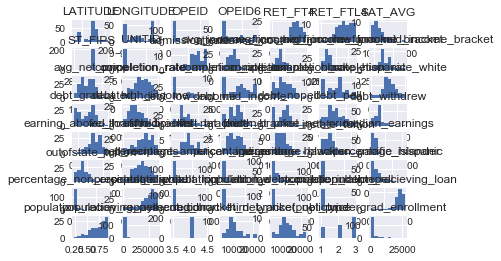

In [9]:
scorecard.hist()

Different types of universities: 1.Public. 2.Private non-profit. 3.Private for-profit

In [27]:
scorecard.groupby(["type"]).agg(["count"])


,UNITID,OPEID,OPEID6,college_name,city,state,ZIP,ST_FIPS,region,LATITUDE,LONGITUDE,admission_rate,SAT_AVG,undergrad_enrollment,percentage_white,percentage_black,percentage_hispanic,percentage_asian,percentage_american_indian,percentage_hawaiian_pacific_islander,percentage_non_resident_alien,avg_income_from_mid_income_bracket,avg_income_from_high_income_bracket,earning_above_threshold,avg_net_price,median_earnings,avg_income_from_low_income_bracket,first_bracket_net_price,second_bracket_net_price(public,third_bracket_net_price,fourth_bracket_net_price,fifth_bracket_net_price,attendance_cost,instate_tuition,outofstate_tuition,pell_recipients,fed_loan_recipients,compeletion_rate,completion_rate_white,completion_rate_black,completion_rate_hispanic,completion_rate_asian,completion_rate_american_indian,debt_graduated,debt_withdrew,debt_low_income,debt_mid_income,debt_high_income,debt_pell,debt_nopell,population_debt_low_income,population_debt_middle_income,population_debt_high_income,population_debt_pell,population_repayment_cohort,population_recieving_loan,population_recieving_pell,RET_FT4,RET_FTL4,majority_black_flag,majority_pell_flag
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,50,50,50,50,50,50,50,50,50,50,50,20,10,50,50,50,50,50,50,50,50,24,24,36,49,38,30,49,41,43,36,28,29,29,29,50,50,50,13,13,12,12,31,32,37,36,30,32,35,38,41,34,37,42,46,39,21,36,14,50,50
2.0,57,57,57,57,57,57,57,57,57,56,56,32,26,45,45,45,45,45,45,45,45,29,32,45,40,42,30,39,0,0,0,0,41,41,41,44,44,40,36,33,33,26,28,42,43,42,41,41,42,42,43,43,42,44,41,43,41,37,3,57,57
3.0,93,93,93,93,93,93,93,93,93,93,93,12,0,93,93,93,93,93,93,93,93,28,28,56,86,57,44,82,0,0,0,0,37,40,40,93,93,81,19,16,13,10,21,78,75,72,56,58,67,72,79,69,71,81,80,71,62,27,47,93,93


[<matplotlib.text.Text at 0x1204db50>, <matplotlib.text.Text at 0x11eabe70>]

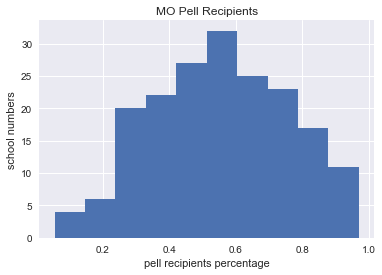

In [8]:
ax= scorecard["pell_recipients"].hist()
plt.title("MO Pell Recipients")

ax.set(xlabel="pell recipients percentage", ylabel="school numbers")

[<matplotlib.text.Text at 0x12b5a350>, <matplotlib.text.Text at 0x1582c2f0>]

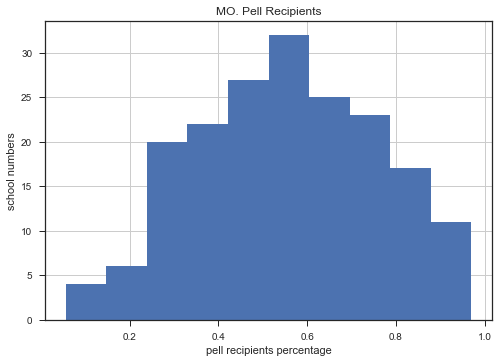

In [22]:
ax= scorecard["pell_recipients"].hist()
plt.title("MO. Pell Recipients")

ax.set(xlabel="pell recipients percentage", ylabel="school numbers")

[<matplotlib.text.Text at 0x14619430>, <matplotlib.text.Text at 0x15482f50>]

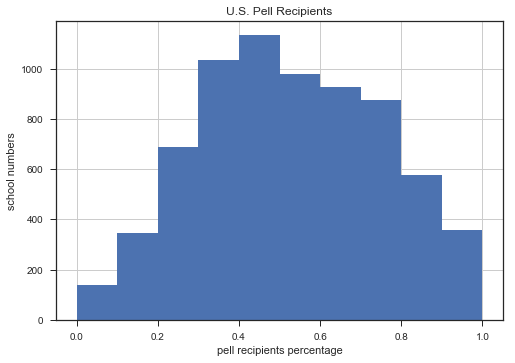

In [21]:
ax= scorecard1["pell_recipients"].hist()
plt.title("U.S. Pell Recipients")

ax.set(xlabel="pell recipients percentage", ylabel="school numbers")

[<matplotlib.text.Text at 0x15b8b750>, <matplotlib.text.Text at 0x15798570>]

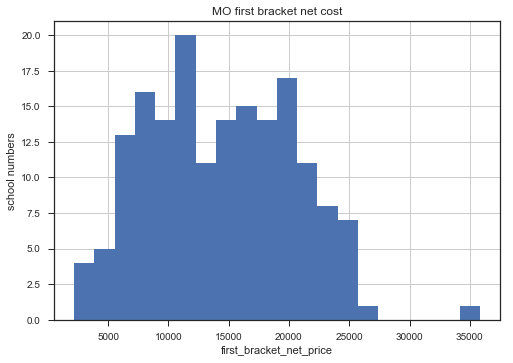

In [19]:
ax=scorecard["first_bracket_net_price"].hist(bins=20)

plt.title("MO first bracket net cost")

ax.set(xlabel="first_bracket_net_price", ylabel="school numbers")



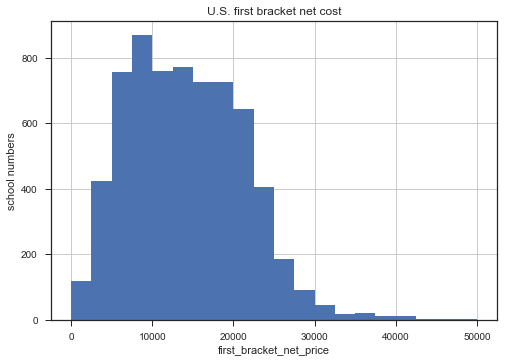

In [20]:
ax=scorecard1["first_bracket_net_price"].hist(bins=20,range=[0, 50000])

plt.title("U.S. first bracket net cost")

ax.set(xlabel="first_bracket_net_price", ylabel="school numbers")

xticks=['0', '5000', '10000', '15000', '20000','25000','30000','35000','40000','45000','50000']

From the frequency histogram produced by python Matplotlib, the U.S. distribution seems to skew towards higher percentage of Pell recipients.After coducting precisie check with MySQL, the share of Pell students in Missouri is similar with that in U.S.
In terms of the school cost, Missouri doesn't have an obvious price advantage to attract towards low-income students.

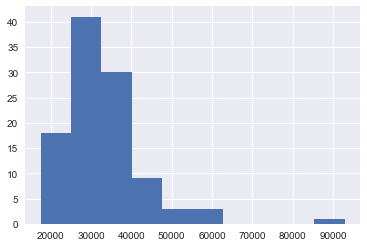

In [11]:
scorecard["avg_income_from_low_income_bracket"].hist()

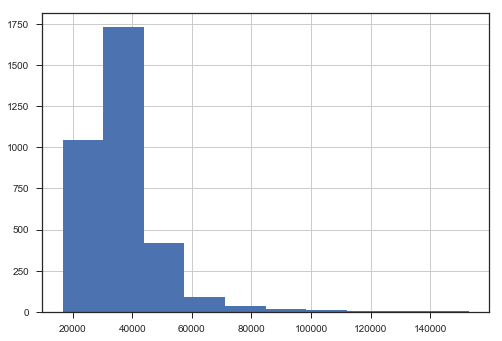

In [45]:
scorecard1["avg_earnings_from_low_income_bracket"].hist()


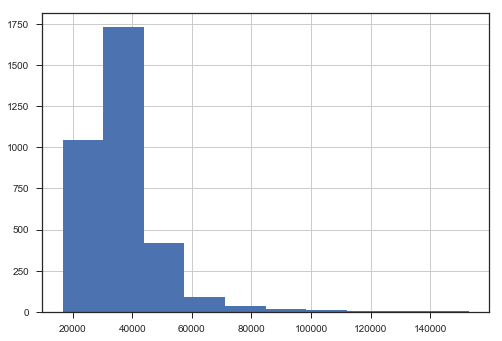

In [34]:
scorecard1["avg_earnings_from_low_income_bracket"].hist()

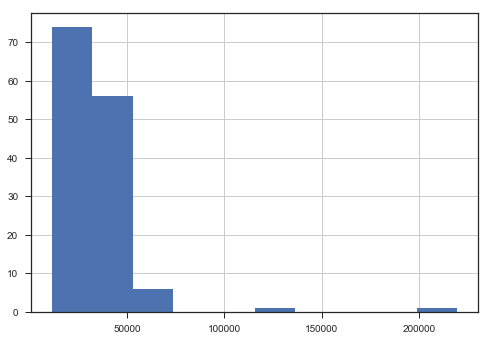

In [29]:
scorecard["median_earnings"].hist()


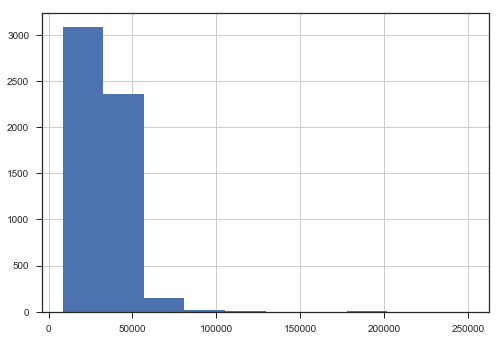

In [30]:
scorecard1["median_earnings"].hist()

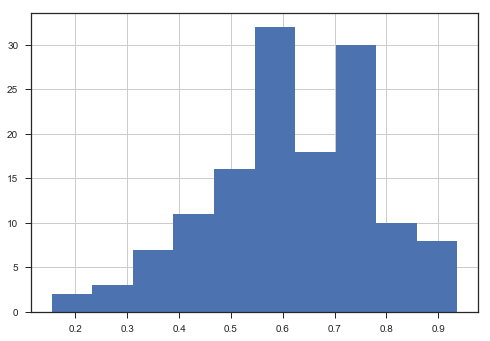

In [46]:
scorecard["earning_above_threshold"].hist()

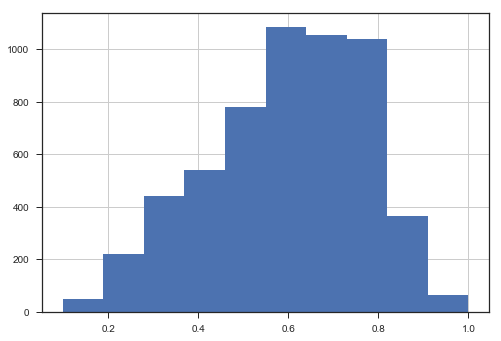

In [47]:
scorecard1["earning_above_threshold"].hist()

Median earnings of graduates are generally lower than $50,000 in both Missouri and U.S. Students from low-income family earn less than $40,000. 
Earning_above_throshold means share of students earning more than the average annual earnings of people with a high school diploma. It seems that Missouri has larger share of schools of which the earning_above_throshold is less than 0.5. 
After checking with MySQL, U.S. has 20% colleges in which half of its students earn less than peers with high school diploma, while Missouri has around 15% colleges.


In [35]:
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#tips = sns.load_dataset("tips")
#g = sns.FacetGrid(tips, col="pell_recipients",  row="first_bracket_net_price")


KeyError: 'first_bracket_net_price'

2. College Access for low-income students

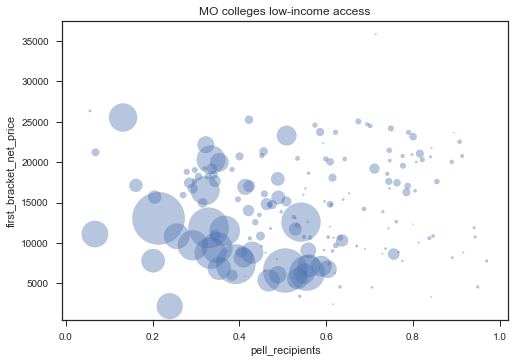

In [43]:
g  = plt.scatter(\
            x=scorecard['pell_recipients'], 
            y=scorecard['first_bracket_net_price'], 
            s=scorecard['undergrad_enrollment']/10, # s is size
            alpha=0.4)  

plt.title("MO colleges low-income access")
plt.xlabel("pell_recipients")
plt.ylabel("first_bracket_net_price")

AttributeError: Unknown property ylabel

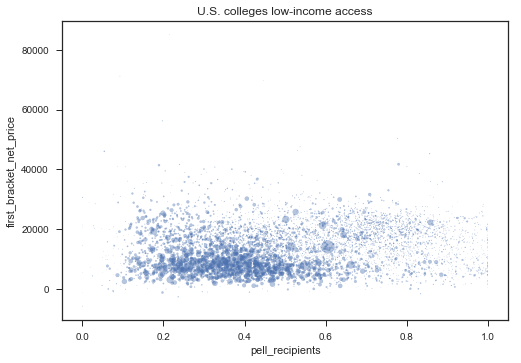

In [42]:
g  = plt.scatter(\
            x=scorecard1['pell_recipients'], 
            y=scorecard1['first_bracket_net_price'], 
            s=scorecard1['undergrad_enrollment']/1000, # s is size
            alpha=0.4)
plt.title("U.S. colleges low-income access")
plt.xlabel("pell_recipients")
plt.ylabel("first_bracket_net_price")


Colleges in Missouri and U.S. tend to have lower than 50% pell recipients and $20,000 net price toward low-income students. 

3.Upward Mobility of Missouri colleges: measured by the completion rate and the mean earnings of students working and not enrolled 10 years after entry in the lowest income(avg_income_from_low_income_bracket) ; How race and economic background affect students' postgraduation achievement?(linear regression line)


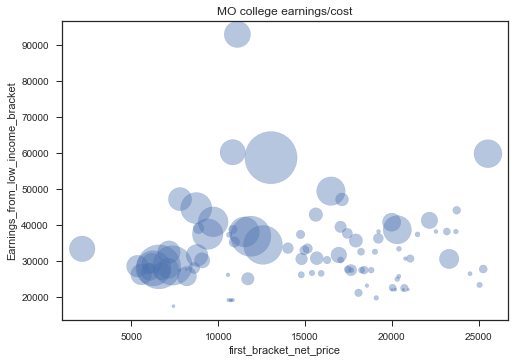

In [23]:


ax = plt.scatter(\
            x=scorecard['first_bracket_net_price'], 
            y=scorecard['avg_income_from_low_income_bracket'], 
            s=scorecard['undergrad_enrollment']/10, # s is size
            alpha=0.4)  
plt.title("MO college earnings/cost")
plt.xlabel("first_bracket_net_price")
plt.ylabel("Earnings_from_low_income_bracket")

TypeError: 'AxesSubplot' object has no attribute '__getitem__'

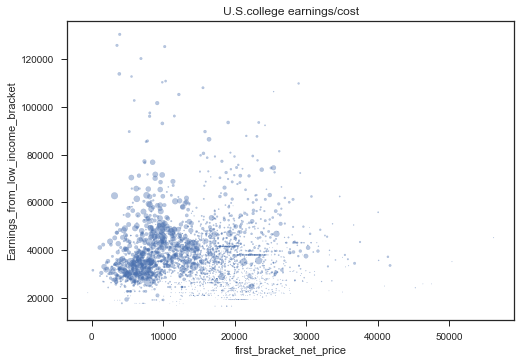

In [44]:
ax = plt.scatter(\
            x=scorecard1['first_bracket_net_price'], 
            y=scorecard1['avg_earnings_from_low_income_bracket'], 
            s=scorecard1['undergrad_enrollment']/1000, # s is size
            alpha=0.4)  
plt.title("U.S.college earnings/cost")
plt.xlabel("first_bracket_net_price")
plt.ylabel("Earnings_from_low_income_bracket")
sns.regplot(x="first_bracket_net_price", y="avg_earnings_from_low_income_bracket", data=scorecard1, ax=g.axes[0, 0])
return_type = 'dict'

School cost and median earnings of Missouri students tend to cluster below $15000 and $40000 respectively, close to the national level. 
An interactive scatter plot of Missouri colleges built with Tableau:https://public.tableau.com/profile/chen.chang#!/vizhome/Missouricollegeaccessforlow-incomestudents/Sheet1

In [ ]:
#ax = plt.scatter(\
            #x=scorecard['avg_net_price'], 
            #y=scorecard['median_earnings'], 
            #s=scorecard['undergrad_enrollment']/10, # s is size
            #alpha=0.4)  
#plt.title("MO college earnings/cost")
#plt.xlabel("net price")
#plt.ylabel("median_earnings")

In [ ]:
# mplstyle.rcParams['pdf.fonttype'] = 42

# pinellas_palette = ["#3498db", "#e74c3c"]
# race_palette = ["#1b9e77", "#d95f02"]

# g = sns.FacetGrid(scorecard,
#                   hue='pinellas_flag', 
#                   col='majority_black_flag',
#                   row='majority_pell_flag',
#                   palette=pinellas_palette,
#                   size=7)
# g.map(plt.scatter, "compeletion_rate", "median_earnings", 
#       alpha=.8, 
#       s=60)

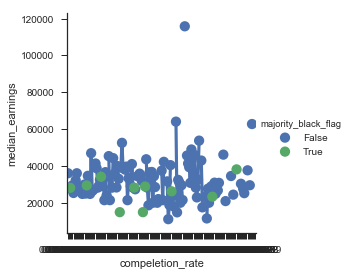

In [50]:
sns.set(style="ticks")

g = sns.factorplot(x="compeletion_rate", y="median_earnings", hue="majority_black_flag", data=scorecard)

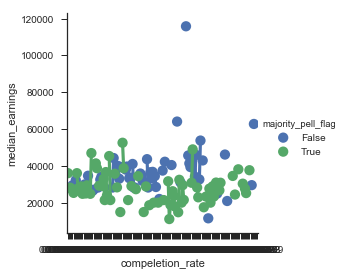

In [51]:
sns.set(style="ticks")

g = sns.factorplot(x="compeletion_rate", y="median_earnings", hue="majority_pell_flag", data=scorecard)

Performance: Race and family income both play a role in the academic and economic performance of college students. Students in the Missouri colleges where majority are black students have lower completion rate and median earnings. Students in the Missouri colleges where majority are from low-income family have lower median earnings. We need to ask why and explore how to break the vicious circle. 

In [ ]:
# >>> g = sns.factorplot(x="majority_pell_flag", y="median_earnings", col="type",
# ...                    data=scorecard, saturation=.5,
# ...                    kind="bar", ci=None, aspect=.6)
# >>> (g.set_axis_labels("", "median_earnings")
# ...   .set_xticklabels(["False", "True"])
# ...   .set_titles("{col_name} {col_var}")
# ...   
# ...   .despine(left=True)) 

In [ ]:
# >>> g = sns.factorplot(x="majority_pell_flag", y="avg_income_from_low_income_bracket", col="type",
# ...                    data=scorecard, saturation=.5,
# ...                    kind="bar", ci=None, aspect=.6)
# >>> (g.set_axis_labels("", "avg_net_price")
# ...   .set_xticklabels(["True", "False"])
# ...   .set_titles("{col_name} {col_var}")
# ...   
# ...   .despine(left=True)) 

In [ ]:
# >>> g = sns.factorplot(x="majority_pell_flag", y="first_bracket_net_price", col="type",
# ...                    data=scorecard, saturation=.5,
# ...                    kind="bar", ci=None, aspect=.6)
# >>> (g.set_axis_labels("", "first_bracket_net_price")
# ...   .set_xticklabels(["False", "True"])
# ...   .set_titles("{col_name} {col_var}")
# ...   
# ...   .despine(left=True)) 

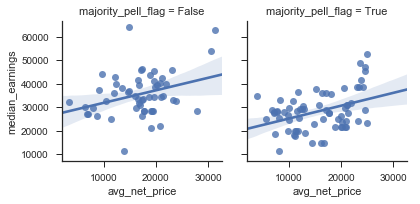

In [48]:
g = sns.FacetGrid(scorecard, col="majority_pell_flag")  
g.map(sns.regplot, "avg_net_price", "median_earnings")  

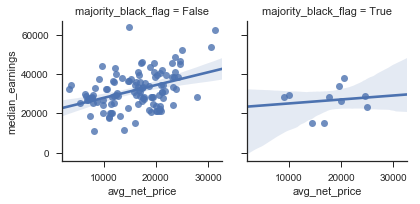

In [49]:
g = sns.FacetGrid(scorecard, col="majority_black_flag")  
g.map(sns.regplot, "avg_net_price", "median_earnings")  

Economic return of higher education: The net price of Missouri colleges is positively related with the earnings of graduates.Schools that accept more Pell recipients have lower post-graduation median earnings, and lower net price. Race does not play a significant role here.

Next step is to use MySQL to find which university has better investment return, that is to say, students in that school can pay less money and earn more after graduation earning.

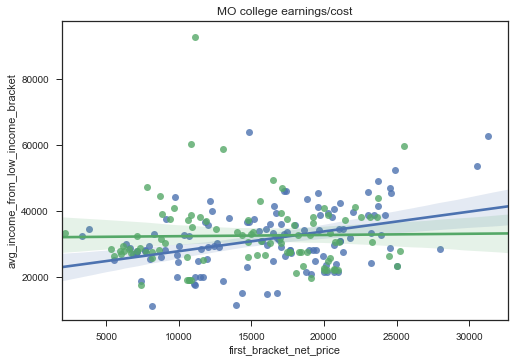

In [52]:
>>> import seaborn as sns
>>> plt.title("MO college earnings/cost")
>>> ax = sns.regplot(x="avg_net_price", y="median_earnings", data=scorecard)

>>> ax = sns.regplot(x="first_bracket_net_price", y="avg_income_from_low_income_bracket", data=scorecard)

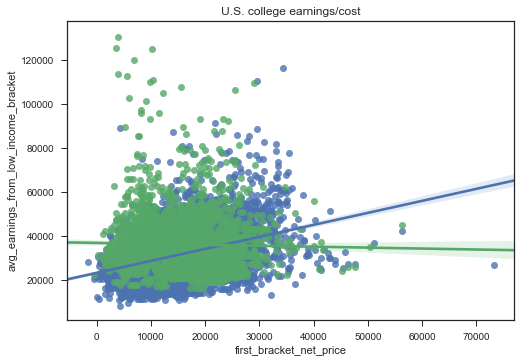

In [56]:
plt.title("U.S. college earnings/cost")
>>> ax = sns.regplot(x="avg_net_price", y="median_earnings", data=scorecard1)

>>> ax = sns.regplot(x="first_bracket_net_price", y="avg_earnings_from_low_income_bracket", data=scorecard1)

The green line represented the regression line of school cost and post-graduation income of low-income students, the slope of which is almost zero. The blue line represented the average Earnings-to-Price ratio for students from all family incomes, which is higher than that of poor students.
Even if higher tuition translates into a higher salary, as for low-income students, both in Missouri and United States, whether you paid more or less for college, the post-graduation earnings didn’t vary much. 


4.SQL check and interview(Seek out outliers and human voice, to be continued)